In [2]:
import numpy as np
import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import networkx as nx
from math import sqrt
SPINE_COLOR = 'gray'
%matplotlib inline
class files():
    pass

matplotlib.rcParams['figure.edgecolor'] = 'white'
matplotlib.rcParams['figure.dpi'] = 200  # figure dots per inch
matplotlib.rcParams['axes.titlesize'] = 'large' # 'large'
matplotlib.rcParams['axes.labelsize'] = 'medium' #'small' 
matplotlib.rcParams['font.family'] = 'serif'
# Set max col width to display
pd.options.display.max_colwidth = 100
import json

# Helper functions


In [6]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'font.size': 10,
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 10,
              'text.usetex': False,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)
# ---------------------------------------------------------------------------

def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def plot_series(x, ys, ax, title, maxY=None, noLegend=True, noMarker=False, 
                inTitle=None, xlabel=None, ylabel=None):
    
    for i in ys:
        if (noMarker):
            ax.plot(x, y[i], label='alpha='+str(i))
        else:
            ax.plot(x, y[i], marker='*', label='alpha='+str(i))

    if (not noLegend):
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel(xlabel)
    ax.set_xlim([0.18, 0.82])
    if (maxY is not None):
        ax.set_ylim([-5, maxY])
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if (inTitle):
        ax.text(0.8, 0.95, inTitle, transform=ax.transAxes, verticalalignment='top', ha="right",
        bbox={'facecolor':'None', 'alpha':0.5, 'pad':5})
    ax.patch.set_alpha(0.8)

# --------------------------------------------------------------------------------
def plot_scatter(x, ys, ax, title, maxY=None, noLegend=True,
                inTitle=None, xlabel=None, ylabel=None):
    
    for i in ys:
        ax.scatter(x, y[i], marker='*', label='alpha='+str(i))

    if (not noLegend):
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel(xlabel)
    ax.set_xlim([0.18, 0.82])
    if (maxY is not None):
        ax.set_ylim([-5, maxY])
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if (inTitle):
        ax.text(0.8, 0.95, inTitle, transform=ax.transAxes, verticalalignment='top', ha="right",
        bbox={'facecolor':'None', 'alpha':0.5, 'pad':5})
    ax.patch.set_alpha(0.8)
     
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def plot_bar(dataArray, xlabels=None, ylabel=None, legendLabels=None, title=None, 
                     figsize=None, ax=None, showLegend=True):
    cmap = plt.rcParams['axes.color_cycle']
    
    N = dataArray.shape[1]
    d = dataArray.shape[0]
    shift = 0.2
    ind = np.arange(N)  # the x locations for the groups
    width = 0.25      # the width of the bars
    
    if ax is None:
        ax = fig.add_subplot(111)
        fig.subplots_adjust(bottom=0.25)
        if (figsize):
            fig = plt.figure(1, figsize=figsize)
        else:
           fig = plt.figure(1) 

    
    rects = list()
    for i, data in enumerate(dataArray):
        rects.append(ax.bar(shift+ind+i*width, data, width, color=cmap[i], label=legendLabels[i]))

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(shift+ind+width*d/2)
    ax.set_ylim([0, 110])
    ax.set_xticklabels(xlabels)
    if (legendLabels and showLegend):
        ax.legend(rects, legendLabels, loc='lower center',  ncol=2, bbox_to_anchor=(0.44, -0.3))
#     ax.margins(0.05)
    
    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1*height, '%.d'%height,
                    ha='center', va='bottom')

    for rect in rects:
        autolabel(rect)
    
    return ax

In [7]:
# latexify(10, 5)
latexify(columns=2)

# Read Data

In [3]:
# Read a result file with the same model type
def getResultDataFrame(fileName):
    df = None
    with open(fileName) as data_file:    
        data = json.load(data_file)        
   
    if data[0]['model_params']['type'] == 'svm':
        df = pd.DataFrame(columns=['C', 'degree', 'gamma', 'kernel', 'type', 'error'])
        for i, result in enumerate(data):
            df.loc[i] = [result['model_params']['params']['C'],
                          result['model_params']['params']['degree'],
                          result['model_params']['params']['gamma'],
                          result['model_params']['params']['kernel'],
                          result['model_params']['type'],
                          result['error']
                         ]
    elif data[0]['model_params']['type'] == 'decisionTree':
        df = pd.DataFrame(columns=['max_features', 'splitter', 'max_depth', 'type', 'error'])
        for i, result in enumerate(data):
            df.loc[i] = [result['model_params']['params']['max_features'],
                          result['model_params']['params']['splitter'],
                          result['model_params']['params']['max_depth'],
                          result['model_params']['type'],
                          result['error']
                         ]
    elif data[0]['model_params']['type'] == 'RandomForestClassifier':
        df = pd.DataFrame(columns=['n_estimators', 'max_depth', 'type', 'error'])
        for i, result in enumerate(data):
            df.loc[i] = [result['model_params']['params']['n_estimators'],
                          result['model_params']['params']['max_depth'],
                          result['model_params']['type'],
                          result['error']
                         ]
#     elif data[0]['model_params']['type'] == '':
    return df

# Comparison bar plot

/home/hosamshahin/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


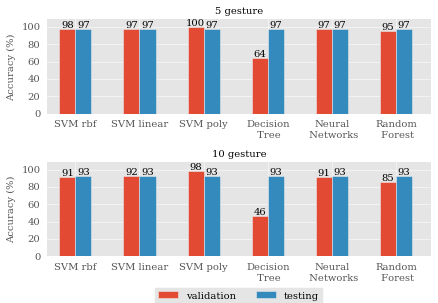

In [8]:
from collections import OrderedDict

# def byteify(inputt):
#     if isinstance(inputt, dict):
#         return {byteify(key):byteify(value) for key,value in inputt.items()}
#     elif isinstance(inputt, list):
#         return [byteify(element) for element in inputt]
#     elif isinstance(inputt, unicode):
#         return inputt.encode('utf-8')
#     else:
#         return inputt

with open('trials/run_hyperopt_all_10.json') as data_file:
    trials = json.load(data_file)

# trials = byteify(trials)

bestResults = OrderedDict([('svm_rbf',10), ('svm_linear',10), ('svm_poly',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])
bestModels = OrderedDict([('svm_rbf',10), ('svm_linear',10), ('svm_poly',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])

for model in trials:
    model_type = model['model_params']['type']
    if model_type == 'svm':
        model_type = model_type + '_' + model['model_params']['params']['kernel']
    model_result = model['error']
    if model_type in bestResults:
        if model_result < bestResults[model_type]:
            bestResults[model_type] = model_result
            bestModels[model_type] = model['model_params']['params']
    else:
        bestResults[model_type] = model_result

# 5 --------------------
with open('trials/run_hyperopt_all_5.json') as data_file:
    trials = json.load(data_file)

# trials = byteify(trials)

bestResults_5 = OrderedDict([('svm_rbf',10), ('svm_linear',10), ('svm_poly',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])
bestModels_5 = OrderedDict([('svm_rbf',10), ('svm_linear',10), ('svm_poly',10), ('decisionTree',10),  
               ('MLPClassifier',10), ('RandomForestClassifier',10)])

for model in trials:
    model_type = model['model_params']['type']
    if model_type == 'svm':
        model_type = model_type + '_' + model['model_params']['params']['kernel']
    model_result = model['error']
    if model_type in bestResults_5:
        if model_result < bestResults_5[model_type]:
            bestResults_5[model_type] = model_result
            bestModels_5[model_type] = model['model_params']['params']
    else:
        bestResults_5[model_type] = model_result
        
# --------------------
dataLists = np.zeros((2,6))

i = 0
for key, value in bestResults_5.items():
    dataLists[0, i] = (1 - value)*100
    i += 1
dataLists[1, :] = (1-np.load('testing_scores_5.npy'))*100
    

modelsNames = ['SVM rbf', 'SVM linear', 'SVM poly', 'Decision\n Tree', 'Neural\n Networks', 'Random\n Forest']
# ax = plot_bar(dataLists, xlabels=modelsNames, ylabel='Testing Accuracy (%)', 
#          legendLabels=['5 gestures validation', '5 gestures testing', 
#                        '10 gestures validation', '10 gestures testing',], title="Best Models Accuracy")

fig = plt.figure(5)
ax = fig.add_subplot(211)
# fig.subplots_adjust(bottom=0.25)

plot_bar(dataLists, xlabels=modelsNames, ylabel='Accuracy (%)', showLegend=False,
         legendLabels=['validation', 'testing'], title="5 gesture", ax=ax)


i = 0
for key, value in bestResults.items():
    dataLists[0, i] = (1 - value)*100
    i += 1
dataLists[1, :] = (1-np.load('testing_scores_10.npy'))*100

ax = fig.add_subplot(212)
plot_bar(dataLists, xlabels=modelsNames, ylabel='Accuracy (%)', showLegend=False,
         legendLabels=['validation', 'testing'], title="10 gesture", ax=ax)

h, l = ax.get_legend_handles_labels()
plt.figlegend(h, l, loc='lower center',  ncol=3, bbox_to_anchor=(0.48, -0.02))

# Save output
plt.savefig('allModels_comparison.eps', format='eps', bbox_inches='tight',dpi=300)


# SVM
---

In [9]:
# SVM (linea, poly, rbf)
svm5 = getResultDataFrame('run_hyperopt_svm_5.json')
# svm5.query("kernel == 'poly'").sort_values(by='error')

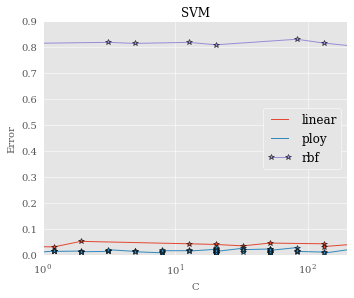

In [10]:
data = svm5.copy()

labels = ['linear', 'ploy', 'rbf']


fig = plt.figure(4, figsize=(12, 5))
fig.subplots_adjust(bottom=0.25)


dataList = []
data1= data.query("kernel == 'linear'").copy()
dataList.append(data1)

data1= data.query("kernel == 'poly' & degree == 3").copy()
dataList.append(data1)

data1= data.query("kernel == 'rbf'").copy()
dataList.append(data1)

# C subplot
ax = fig.add_subplot(121)
ax.set_title("SVM")
for i,g in enumerate(dataList):
#     print(g.ix[:, 1:])
    g.sort_values(by='C', inplace=True)
    g.plot(x='C', y='error', marker='*', label=labels[i], ax=ax, legend=True, logx=True)
    ax.set_ylabel("Error")
    ax.set_xlim([1,200])

# Save output
plt.savefig('svm5_C_gamma_10.eps', format='eps', bbox_inches='tight', dpi=300)


In [11]:
svm5 = getResultDataFrame('run_hyperopt_svm_rbf_5.json').sort_values(by='C')
svm5.head()

,C,degree,gamma,kernel,type,error
247,0.0001,1,6.551286e+00,rbf,svm,0.802667
138,0.0001,1,1.389495e+02,rbf,svm,0.814667
198,0.0001,1,6.250552e-09,rbf,svm,0.810667
28,0.0001,1,3.088844e-01,rbf,svm,0.808000
80,0.0001,1,2.682696e-02,rbf,svm,0.817333


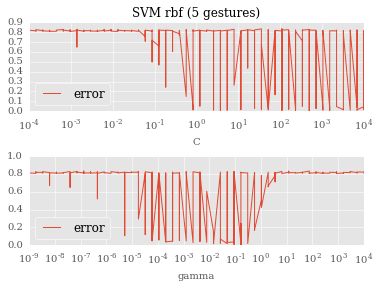

In [12]:
fig = plt.figure(2)
ax = fig.add_subplot(211)
ax.set_title("SVM rbf (5 gestures)")
svm5.plot(x='C', y='error', logx=True, ax=ax)
ax = fig.add_subplot(212)
svm5.sort_values(by='gamma').plot(x='gamma', y='error', logx=True, ax=ax)
ax.set_ylim([0,1])
plt.savefig('svm_C_gamma_5.eps', format='eps', bbox_inches='tight', dpi=300)


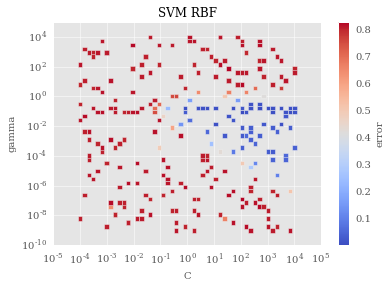

In [13]:
data = svm5.copy()

fig = plt.figure(4)
ax = fig.add_subplot(111)

ax.set_title("SVM RBF")
data.plot(x='C', y='gamma', marker='s', legend=True, ax=ax, logy=True,
              logx=True, c='error', kind='scatter', cmap=plt.cm.coolwarm)

# Save output
plt.savefig('svm_5_C_gamma_heat.eps', format='eps', bbox_inches='tight', dpi=300)

In [14]:
data.shape

(300, 6)

# Decision Tree
--------------

In [15]:
files = ['hyperopt_DT_best_5.json', 'hyperopt_DT_random_5.json', 'hyperopt_DT_best_10.json', 'hyperopt_DT_random_10.json']
dt = getResultDataFrame(files[0])
dt.head()

,max_features,splitter,max_depth,type,error
0,auto,best,15,decisionTree,0.429333
1,auto,best,16,decisionTree,0.426667
2,auto,best,4,decisionTree,0.546667
3,auto,best,8,decisionTree,0.410667
4,auto,best,11,decisionTree,0.445333


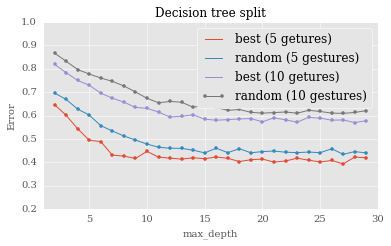

In [35]:

labels = ['best (5 getures)', 'random (5 gestures)',
          'best (10 getures)', 'random (10 gestures)'] # splitter

markers = ['.', 'x','.', 'x'] # splitter

fig = plt.figure(4)
fig.subplots_adjust(bottom=0.25)

dataList = []
for f in files:
    data1= getResultDataFrame(f) # auto 5
    dataList.append(data1)

color = plt.rcParams['axes.color_cycle']
# max_depth plot
ax = fig.add_subplot(111)
ax.set_title("Decision tree split")
for i,g in enumerate(dataList):    
    g.sort_values(by='max_depth', inplace=True)
    g2 = g.groupby(by='max_depth').mean()
    g2.reset_index(inplace=True)
    g2.plot(x='max_depth', y='error', label=labels[i], ax=ax, legend=True, color=color[i], marker='.')
    ax.set_ylabel("Error")
    ax.set_xlim([1,30])
    ax.set_ylim([0.2,1])

# Save output
# plt.savefig('DT_max_depth_split.png',bbox_inches='tight', dpi=300)
plt.savefig('DT_max_depth_split.eps', format='eps', bbox_inches='tight', dpi=300)


In [24]:
dataList[0].query('max_depth == 2')

,max_features,splitter,max_depth,type,error
96,auto,best,2,decisionTree,0.670667
200,auto,best,2,decisionTree,0.690667
266,auto,best,2,decisionTree,0.608000
60,auto,best,2,decisionTree,0.605333
30,auto,best,2,decisionTree,0.578667
122,auto,best,2,decisionTree,0.617333
161,auto,best,2,decisionTree,0.669333
234,auto,best,2,decisionTree,0.730667


# Random Forest
-----------

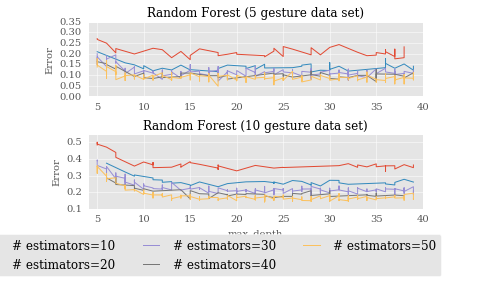

In [21]:

fig = plt.figure(4)
fig.subplots_adjust(bottom=0.25)

#  n_estimators plot
data1= getResultDataFrame('run_hyperopt_randomForestClassifier_5.json') 
ax = fig.add_subplot(211)
ax.set_title("Random Forest (5 gesture data set)")
data1.sort_values(by='max_depth', inplace=True)

groups = data1.groupby('n_estimators')
for i, depth in groups:
#     depth = depth.groupby(by='max_depth').mean().reset_index()
    depth.plot(x='max_depth', y='error', label='# estimators='+str(i), ax=ax, legend=False)
    ax.set_ylabel("Error")
    ax.set_xlim([4,40])
    ax.set_ylim([0,.35])
    ax.set_xlabel('')
    
#  n_estimators plot
data1= getResultDataFrame('run_hyperopt_randomForestClassifier_10.json') 
ax = fig.add_subplot(212)
ax.set_title("Random Forest (10 gesture data set)")
data1.sort_values(by='max_depth', inplace=True)

groups = data1.groupby('n_estimators')
for i, depth in groups:
#     depth = depth.groupby(by='max_depth').mean().reset_index()
    depth.plot(x='max_depth', y='error', label='# estimators='+"%d"%i, ax=ax, legend=False)
    ax.set_ylabel("Error")
    ax.set_xlim([4,40])
    ax.set_ylim([0.1,.55])

h, l = ax.get_legend_handles_labels()
plt.figlegend(h, l, loc='lower center',  ncol=3, bbox_to_anchor=(0.48, 0))

plt.savefig('randomForest_estimators.eps', format='eps', bbox_inches='tight', dpi=300)


# Confusion Matrix

Automatically created module for IPython interactive environment


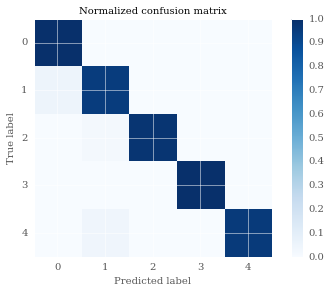

In [14]:
print(__doc__)

import numpy as np

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, target_names=None, title='Confusion matrix', cmap=plt.cm.Blues):
    fig, ax = plt.subplots()
    cmx = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    fig.colorbar(cmx)
    tick_marks = np.arange(len(target_names))
#     ax.xticks(tick_marks, target_names, rotation=45)
#     ax.yticks(tick_marks, target_names)
#     ax.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')


# load confusion matrix
data_set = '5'
cm = np.load('./confusionMatrix/svm_cm_' + data_set + '.npy')
target_names = np.load('./confusionMatrix/svm_names_' + data_set + '.npy')
# np.set_printoptions(precision=2)
# print('Confusion matrix, without normalization')
# print(cm)
# plt.figure()
# plot_confusion_matrix(cm, target_names)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# print('Normalized confusion matrix')
# print(cm_normalized)
# plt.figure()
plot_confusion_matrix(cm_normalized, target_names, title='Normalized confusion matrix')

# plt.show()
plt.savefig('Figs/cm_svm_'+data_set+'.eps', format='eps', bbox_inches='tight',dpi=100)

In [58]:
from sklearn.cross_validation import train_test_split

dataset_name = '5_gestures_256_words'

X = np.load('../data/'+dataset_name+'_data.npy')
Y = np.load('../data/'+dataset_name+'_labels.npy')
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

np.save('../data/'+dataset_name+'_train_data.npy', X_train)
np.save('../data/'+dataset_name+'_test_data.npy', X_test)
np.save('../data/'+dataset_name+'_train_labels.npy', Y_train)
np.save('../data/'+dataset_name+'_test_labels.npy', Y_test)


('X shape: ', (1500, 256))
('Y shape: ', (1500,))
('X_train shape: ', (1200, 256))
('X_test shape: ', (300, 256))
('Y_train shape: ', (1200,))
('Y_test shape: ', (300,))
